In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import random


## load & split data into train & test set
def load_data(name):
    path = os.getcwd()
    data_path = os.path.join(path, name)
    data_raw = pd.read_csv(data_path)
    data_index = data_raw.keys()

    return (data_raw, data_index)


# normalize the dataset
def normalize_data(data_set, bit=5):
    normalize_dataset = []
    data_rf_t = np.array(data_set.copy()).T.tolist()
    for row in data_rf_t:
        max_row = max(row)
        min_row = min(row)
        normalize_dataset.append([round((value - min_row) / (max_row - min_row), bit) for value in row])
    normalize_dataset = np.array(normalize_dataset).T.tolist()

    return normalize_dataset


def merge_dataset(dataset, dataset_target):
    new_dataset=[]
    for item in zip(dataset, dataset_target):
        item[0].append(item[1])
        new_dataset.append(item[0])
    return new_dataset


## plot histogram of each attribute
def plot_hist(data_refine, data_refine_index):
    data_zip = list(zip(*data_refine))

    for index in range(len(data_zip)):
        each_attr = data_zip[index]
        low_b = math.floor(min(each_attr))
        upp_b = math.ceil(max(each_attr))
        plt.hist(each_attr, range=[low_b, upp_b])
        plt.title(data_refine_index[index], loc='center')
        plt.grid()
        plt.show()


## split data_test from data_train, split_ration=0.7, 70% data for training, 30% of data for testing
def split_train_test_data(data_refine, data_refine_target, split_ratio=0.7, seed=None):
    if seed is not None:
        random.seed(seed)
    data_train = []
    data_train_target = []
    train_length = int(len(data_refine) * split_ratio)

    for index in range(train_length):
        pos = random.randint(0, len(data_refine) - 1)
        data_train.append(data_refine.pop(pos))
        data_train_target.append(data_refine_target.pop(pos))

    data_test = data_refine
    data_test_target = data_refine_target

    return (data_train, data_train_target, data_test, data_test_target)


# shuffle the categarized data
def shuffle_data_ca(data_ca, data_ca_target):
    data_shf = []
    data_shf_target = []
    for i in range(len(data_ca)):
        loc = random.randint(0, len(data_ca) - 1)
        data_shf.append(data_ca.pop(loc))
        data_shf_target.append(data_ca_target.pop(loc))

    return (data_shf, data_shf_target)


# scale all data into [0,1]
def scale_data(dt_train):
    dt_new = dt_train
    col_max_min = [(np.min(col), np.max(col)) for col in list(zip(*dt_new)) ]
    for row_index in range(len(dt_new)):
        for col_index in range(len(dt_new[row_index])):
            col_min = col_max_min[col_index][0]
            col_max = col_max_min[col_index][1]
            dt_new[row_index][col_index] = (dt_new[row_index][col_index]-col_min)/(col_max-col_min)
    return dt_new

In [248]:
import matplotlib.pyplot as plt;
data_raw, data_index = load_data('housing.csv');
data_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [249]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# check if the data is clean

In [250]:
error_count=[]
for index in data_index:
    count=0
    for val in data_raw[index].isnull():
        if val is True:
            count+=1
    if count>0:
        error_count.append((index, count))

In [251]:
error_count

[('total_bedrooms', 207)]

In [252]:
data_raw.corr()['median_house_value'].sort_values(ascending=False) 

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# Put categary texts into numeric values

# value_counts() to find out what categaries 

# groupby() to combine split sample into one group

In [253]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                               'Parrot', 'Parrot'],
                    'Max Speed': [380., 370., 24., 26.]})
df = df.groupby('Animal')
df.first()

,Max Speed
Animal,
Falcon,380.0
Parrot,24.0


In [254]:
data_raw['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [255]:
group_ocean=data_raw.groupby('ocean_proximity')
ocean_categary_mean_data = group_ocean.mean()
group_house_value=ocean_categary_mean_data['median_house_value'].sort_values(ascending=False)
group_house_value

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

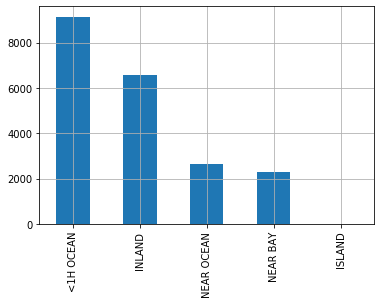

In [256]:
data_raw['ocean_proximity'].value_counts().plot.bar()
plt.grid()
plt.show()

In [257]:
data_raw = data_raw.replace({'ocean_proximity':{
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5,
}})

data_raw['ocean_proximity'].value_counts()

1    9136
2    6551
3    2658
4    2290
5       5
Name: ocean_proximity, dtype: int64

# filling in the invalid data with SimpleImputer

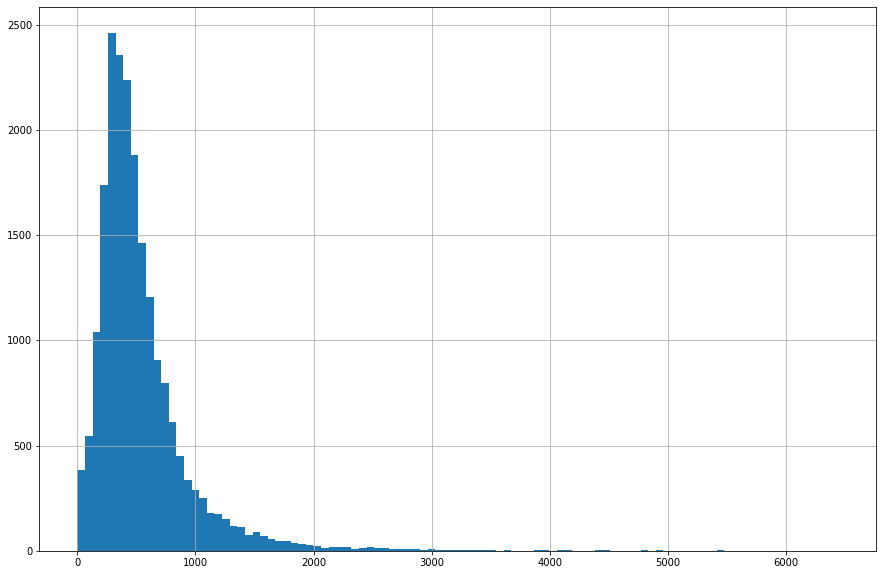

In [258]:
data_raw['total_bedrooms'].hist(bins=100,figsize=[15,10])
plt.show()

In [259]:
from sklearn.impute import SimpleImputer

In [260]:
imputer = SimpleImputer(strategy='median')
imputer.fit(data_raw)
X=imputer.transform(data_raw)
data_raw = pd.DataFrame(X, columns = data_index)

In [261]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB


In [262]:
data_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4.0


# describe() gives out a data statistical describe for numeric attributes only

In [263]:
data_raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.908769
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,1.004549
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


# hist() to plot the whole dataset

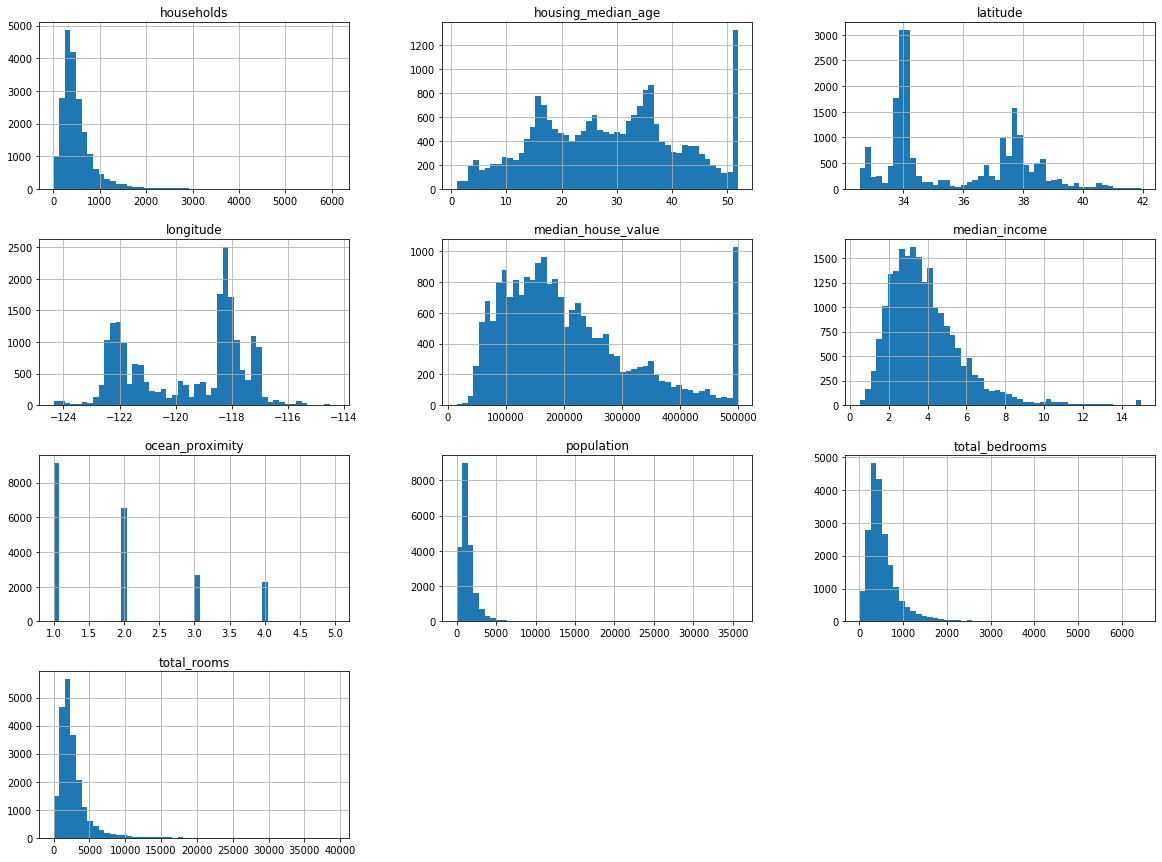

In [264]:
data_raw.hist(bins=50,figsize=[20,15])
plt.show()

# cut() to put one attribute into a segment with certain bins with labels

In [265]:
data_raw['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [266]:
data_raw['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

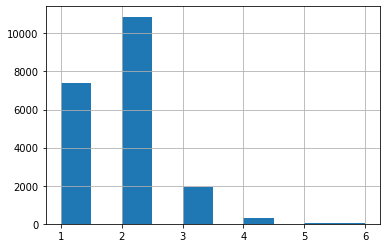

In [267]:
data_raw['income_categary'] = pd.cut(x=data_raw['median_income'],bins=[0,3,6,9,12,15,18],
                                     labels=[1,2,3,4,5,6])
data_raw['income_categary'].hist()
plt.show()

In [268]:
data_raw['income_categary'].value_counts()/len(data_raw['income_categary'])

2    0.526890
1    0.358672
3    0.094719
4    0.014244
5    0.003101
6    0.002374
Name: income_categary, dtype: float64

In [269]:
data_raw['income_categary']

0        3
1        3
2        3
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: income_categary, Length: 20640, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [270]:
data_raw.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# data visualization

In [271]:
data_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categary
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4.0,2


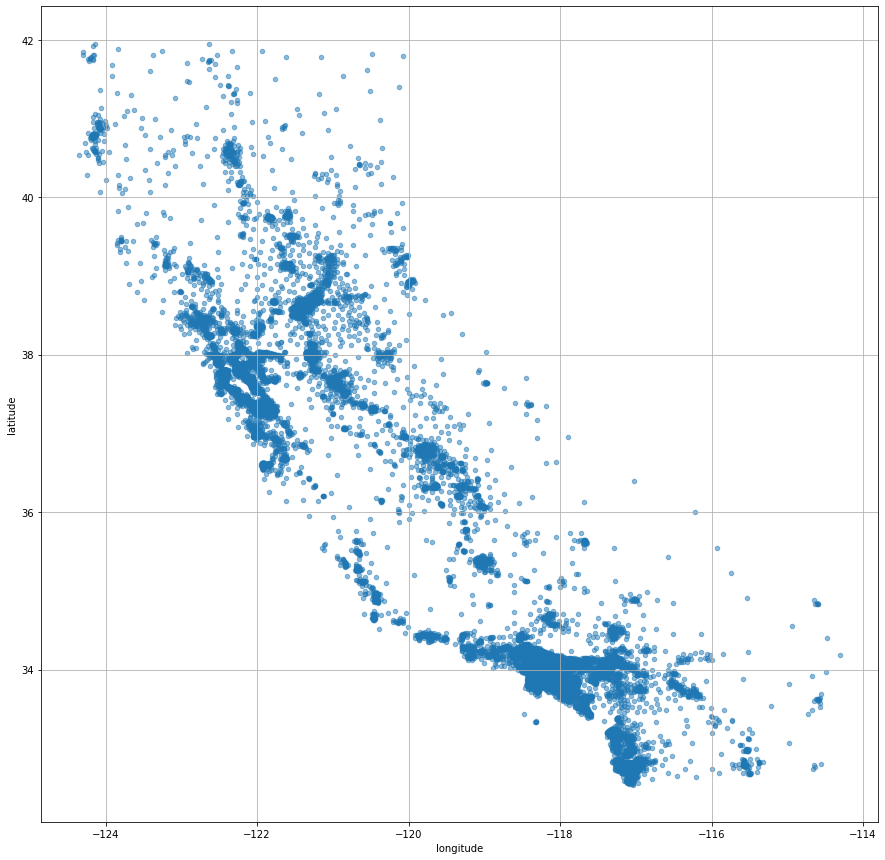

In [272]:
data_raw.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,figsize=(15,15),grid=True);


# scatter plot has two parameters: radius of circles and the color of circles
# radius of circles -> s
# color of circles -> c

In [273]:
data_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categary
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4.0,2


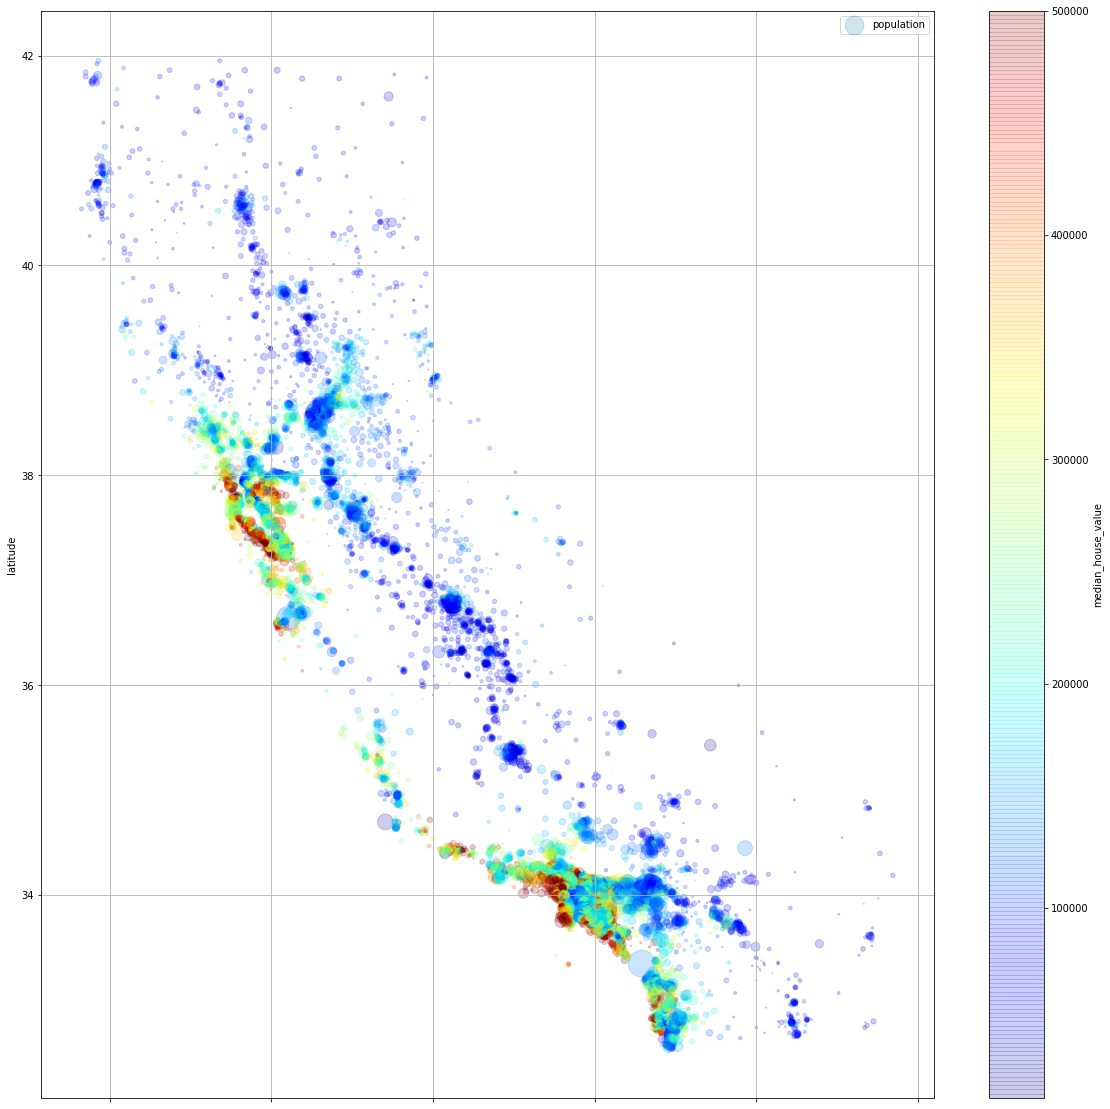

In [274]:
data_raw.plot(kind='scatter', x="longitude", y="latitude", alpha=0.2,figsize=(20,20), 
            s=data_raw['population']/50, label='population',
            c='median_house_value',colormap=plt.get_cmap('jet'),colorbar=True,
            grid=True);


# corr() calculate correlation coefficient

In [275]:
corr_matrix = data_raw.corr();
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
ocean_proximity       0.021732
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [276]:
data_raw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_categary
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4.0,2


# combination of attributes

In [277]:
data_raw['rooms_per_houshold']=data_raw['total_rooms']/data_raw['households']
data_raw['bedrooms_per_room']=data_raw['total_bedrooms']/data_raw['total_rooms']
data_raw['population_per_household']=data_raw['population']/data_raw['households']
corr_matrix = data_raw.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_houshold          0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
ocean_proximity             0.021732
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

# drop columns for ml algorithms

In [278]:
data_raw=data_raw.drop(['households','total_bedrooms','ocean_proximity','population_per_household','population',
                       'longitude'],axis=1)
data_raw.shape

(20640, 8)

In [279]:
data_raw.head()

,latitude,housing_median_age,total_rooms,median_income,median_house_value,income_categary,rooms_per_houshold,bedrooms_per_room
0,37.88,41.0,880.0,8.3252,452600.0,3,6.984127,0.146591
1,37.86,21.0,7099.0,8.3014,358500.0,3,6.238137,0.155797
2,37.85,52.0,1467.0,7.2574,352100.0,3,8.288136,0.129516
3,37.85,52.0,1274.0,5.6431,341300.0,2,5.817352,0.184458
4,37.85,52.0,1627.0,3.8462,342200.0,2,6.281853,0.172096


In [280]:
data_raw.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_houshold    0.151948
total_rooms           0.134153
housing_median_age    0.105623
latitude             -0.144160
bedrooms_per_room    -0.233303
Name: median_house_value, dtype: float64

In [281]:
data_raw['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

# scale all the values

In [284]:
from sklearn.preprocessing import MinMaxScaler
from copy import deepcopy

data_target = deepcopy(data_raw.iloc[:,4].tolist())

In [285]:
data_target

[452600.0,
 358500.0,
 352100.0,
 341300.0,
 342200.0,
 269700.0,
 299200.0,
 241400.0,
 226700.0,
 261100.0,
 281500.0,
 241800.0,
 213500.0,
 191300.0,
 159200.0,
 140000.0,
 152500.0,
 155500.0,
 158700.0,
 162900.0,
 147500.0,
 159800.0,
 113900.0,
 99700.0,
 132600.0,
 107500.0,
 93800.0,
 105500.0,
 108900.0,
 132000.0,
 122300.0,
 115200.0,
 110400.0,
 104900.0,
 109700.0,
 97200.0,
 104500.0,
 103900.0,
 191400.0,
 176000.0,
 155400.0,
 150000.0,
 118800.0,
 188800.0,
 184400.0,
 182300.0,
 142500.0,
 137500.0,
 187500.0,
 112500.0,
 171900.0,
 93800.0,
 97500.0,
 104200.0,
 87500.0,
 83100.0,
 87500.0,
 85300.0,
 80300.0,
 60000.0,
 75700.0,
 75000.0,
 86100.0,
 76100.0,
 73500.0,
 78400.0,
 84400.0,
 81300.0,
 85000.0,
 129200.0,
 82500.0,
 95200.0,
 75000.0,
 67500.0,
 137500.0,
 177500.0,
 102100.0,
 108300.0,
 112500.0,
 131300.0,
 162500.0,
 112500.0,
 112500.0,
 137500.0,
 118800.0,
 98200.0,
 118800.0,
 162500.0,
 137500.0,
 500001.0,
 162500.0,
 137500.0,
 162500.0,
 1

In [134]:
data_target

0        3
1        3
2        3
3        2
4        2
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: income_categary, Length: 20640, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [125]:
data_raw = data_raw.drop(columns=['median_house_value'])

In [130]:
data_target.tolist()

[452600.0,
 358500.0,
 352100.0,
 341300.0,
 342200.0,
 269700.0,
 299200.0,
 241400.0,
 226700.0,
 261100.0,
 281500.0,
 241800.0,
 213500.0,
 191300.0,
 159200.0,
 140000.0,
 152500.0,
 155500.0,
 158700.0,
 162900.0,
 147500.0,
 159800.0,
 113900.0,
 99700.0,
 132600.0,
 107500.0,
 93800.0,
 105500.0,
 108900.0,
 132000.0,
 122300.0,
 115200.0,
 110400.0,
 104900.0,
 109700.0,
 97200.0,
 104500.0,
 103900.0,
 191400.0,
 176000.0,
 155400.0,
 150000.0,
 118800.0,
 188800.0,
 184400.0,
 182300.0,
 142500.0,
 137500.0,
 187500.0,
 112500.0,
 171900.0,
 93800.0,
 97500.0,
 104200.0,
 87500.0,
 83100.0,
 87500.0,
 85300.0,
 80300.0,
 60000.0,
 75700.0,
 75000.0,
 86100.0,
 76100.0,
 73500.0,
 78400.0,
 84400.0,
 81300.0,
 85000.0,
 129200.0,
 82500.0,
 95200.0,
 75000.0,
 67500.0,
 137500.0,
 177500.0,
 102100.0,
 108300.0,
 112500.0,
 131300.0,
 162500.0,
 112500.0,
 112500.0,
 137500.0,
 118800.0,
 98200.0,
 118800.0,
 162500.0,
 137500.0,
 500001.0,
 162500.0,
 137500.0,
 162500.0,
 1

In [287]:
scaler = MinMaxScaler()
# data_target_scale = scaler.fit_transform(data_target)
# data_raw_scale = scaler.fit_transform(data_raw)

ValueError: Expected 2D array, got 1D array instead:
array=[452600. 358500. 352100. ...  92300.  84700.  89400.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
print(*data_raw[0:10,:],sep='\n')

In [ ]:
data_new = pd.DataFrame(data_raw)
data_new_target = deepcopy(data_new[4])

In [ ]:
data_new_target

In [ ]:
data_new = data_new.drop(columns=[4])

In [ ]:
data_new.head()

# Seperate data_test and data_train

In [ ]:
from sklearn.model_selection import train_test_split
from copy import deepcopy
train_set, test_set, train_set_target, test_set_target = train_test_split(data_new,data_new_target,test_size=0.2, random_state=1);

In [ ]:
train_set = train_set.values.tolist()
train_set

# train the model